# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns

import numpy as np
import pandas as pd
import random

# Welcome to SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [4]:
temp
pass

#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Select the rows where state is New York

In [9]:
temp2 = temp[temp['State'] == 'New York']

#### What is the average of the temperature of cities in New York?

In [10]:
temp2.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [11]:
temp["City"][temp["Temperature"] > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
a = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]
a["City"]

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [12]:
temp[["City"]][(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [13]:
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


In [18]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<Axes: ylabel='Count'>

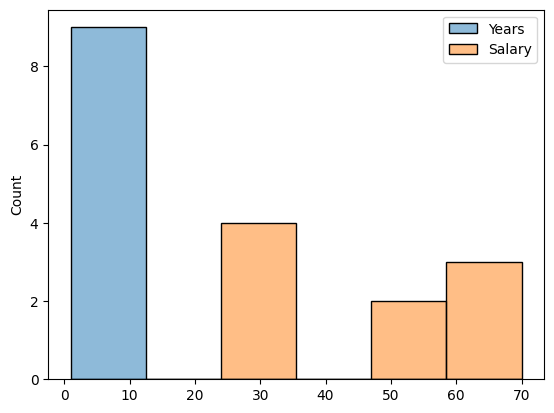

In [15]:
sns.histplot(employee)

#### What's the average salary in this company?

In [20]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [21]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [22]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [24]:
employee_cheap = employee["Salary"].min()
employee_cheap

30

In [26]:
employee[employee["Salary"] == employee.Salary.min()]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,30
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,30
4,Samuel,Sales,Master,M,associate,3,30
5,Eva,Sales,Bachelor,F,associate,2,30
6,Carlos,IT,Master,M,VP,8,30
7,Pedro,IT,Phd,M,associate,7,30
8,Ana,HR,Master,F,VP,8,30


#### Could you give all the information about an employee called David?

In [28]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [30]:
employee["Salary"][employee["Name"] == "David"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [31]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,30
5,Eva,Sales,Bachelor,F,associate,2,30
7,Pedro,IT,Phd,M,associate,7,30


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [32]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,30
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [38]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]




,Name,Department,Education,Gender,Title,Years,Salary


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [41]:
employee.groupby("Years").agg({"Salary":"mean"})

,Salary
Years,
1,30.0
2,30.0
3,30.0
4,30.0
7,30.0
8,30.0


####  What is the average Salary per title?

In [44]:
average_salary_per_title = employee.groupby('Title')['Salary'].mean()
average_salary_per_title

Title
VP           30.0
analyst      30.0
associate    30.0
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<Axes: xlabel='Years'>

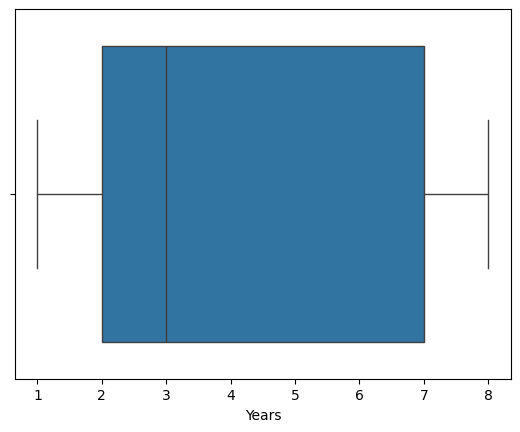

In [45]:
sns.boxplot(x =employee.Years)

In [50]:
year =employee [["Years"]]
q1 = year.quantile(0.25)
q3 = year.quantile(0.75)

q1

Years    2.0
Name: 0.25, dtype: float64

In [51]:
q3

Years    7.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

<Axes: xlabel='Salary', ylabel='Gender'>

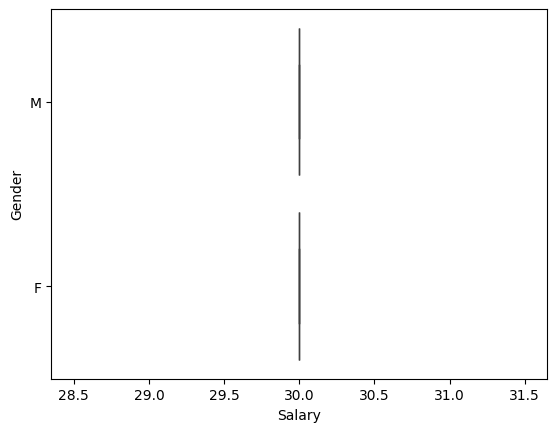

In [53]:
sns.boxplot(x =employee.Salary, y =employee.Gender)

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [54]:
employee.groupby('Title').agg({"Salary":"mean"})

,Salary
Title,
VP,30.0
analyst,30.0
associate,30.0


In [55]:
employee.groupby('Title').agg({"Salary":"max"})

,Salary
Title,
VP,30
analyst,30
associate,30


In [56]:
employee.groupby('Title').agg({"Salary":"min"})

,Salary
Title,
VP,30
analyst,30
associate,30


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
# your answer here

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here